<a href="https://colab.research.google.com/github/pranavAL/Generative-Deep-Learning/blob/main/Generative_learning_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing the libraires

In [1]:
import numpy as np
from keras.utils import to_categorical
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Input, Flatten, Dense, Conv2D, BatchNormalization, Dropout, LeakyReLU, Activation
from keras.models import Model
from keras.optimizers import Adam
import matplotlib.pyplot as plt

### Loading the dataset

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


### Scaling the datasets

In [3]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

### One hot encodings of the label

In [4]:
NUM_CLASSES = 10
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

### Building the model
Keras provides two ways to build neural networks
* Sequential model
* Functional API


In [5]:
model = Sequential([
                    Dense(200, activation = 'relu', input_shape=(32, 32, 3)),
                    Flatten(),
                    Dense(150, activation = 'relu'),
                    Dense(10, activation = 'softmax')
])

In [6]:
input_layer = Input(shape=(32,32,3))
x = Flatten()(input_layer)

x = Dense(units = 200, activation = 'relu')(x)
x = Dense(units = 150, activation = 'relu')(x)

output_layer = Dense(units = 10, activation = 'softmax')(x)

model = Model(input_layer, output_layer)

In [7]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 200)               614600    
_________________________________________________________________
dense_4 (Dense)              (None, 150)               30150     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1510      
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


### Compiling the model

In [8]:
opt = Adam(lr=0.0005)
model.compile(loss = 'categorical_crossentropy', optimizer=opt,
              metrics=['accuracy'])

### Training the model

In [9]:
model.fit(x_train, y_train, batch_size = 32, epochs = 10, shuffle = True)

Epoch 1/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.8489 - accuracy: 0.3311
Epoch 2/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.6697 - accuracy: 0.4002
Epoch 3/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.5867 - accuracy: 0.4349
Epoch 4/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.5352 - accuracy: 0.4518
Epoch 5/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.4952 - accuracy: 0.4664
Epoch 6/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4616 - accuracy: 0.4779
Epoch 7/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4367 - accuracy: 0.4865
Epoch 8/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.4124 - accuracy: 0.4982
Epoch 9/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.3965 - accuracy: 0.5023
Epoch 10/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.375

### Testing the model

In [10]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.4679 - accuracy: 0.4817


[1.4678784608840942, 0.48170000314712524]

### Prediction of the trained model

In [11]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

### Visualizing the results

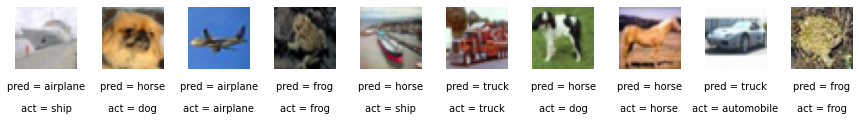

In [12]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
  img = x_test[idx]
  ax = fig.add_subplot(1, n_to_show, i+1)
  ax.axis('off')
  ax.text(0.5, -0.35, 'pred = ' +str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
  ax.text(0.5, -0.7, 'act = ' +str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
  ax.imshow(img)

### Improving the performance

In [13]:
input_layer = Input((32,32,3))

x = Conv2D(filters = 32, kernel_size = 3,
           strides = 1, padding = 'same')(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters = 32, kernel_size = 3, 
           strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters = 64, kernel_size = 3,
           strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Flatten()(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate = 0.5)(x)

x = Dense(NUM_CLASSES)(x)
output_layer =  Activation('softmax')(x)

model = Model(input_layer, output_layer)

In [14]:
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 16, 16, 32)       

In [15]:
opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt,
              metrics=['accuracy'])

In [16]:
model.fit(x_train, y_train, batch_size = 32, epochs = 10, shuffle = True)

Epoch 1/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5223 - accuracy: 0.4682
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1314 - accuracy: 0.6007
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9975 - accuracy: 0.6504
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9194 - accuracy: 0.6776
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8498 - accuracy: 0.7040
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7978 - accuracy: 0.7217
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7516 - accuracy: 0.7379
Epoch 8/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7078 - accuracy: 0.7516
Epoch 9/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6730 - accuracy: 0.7641
Epoch 10/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.629

In [17]:
model.evaluate(x_test, y_test, batch_size=1000)

10/10 [==============================] - 0s 16ms/step - loss: 0.9821 - accuracy: 0.6799


[0.9820871949195862, 0.6798999905586243]